In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#read in the data using pandas
df = pd.read_table('diabetesdata.txt')
#check data has been read in properly
df

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

In [2]:
x = df.drop('Diabetes',axis=1)
y = df['Diabetes']
x

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Diabetes, Length: 768, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression

In [6]:
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000,penalty='none')
# Fit the classifier to the data
logmodel.fit(x,y)

LogisticRegression(max_iter=1000, penalty='none')

In [7]:
logmodel.coef_

array([[ 1.23369576e-01,  3.51829183e-02, -1.32950458e-02,
         6.22867570e-04, -1.19362855e-03,  8.97691375e-02,
         9.47327578e-01,  1.48559322e-02]])

In [8]:
logmodel.intercept_

array([-8.4107727])

In [9]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

   Variables  Coefficients
0  Intercept     -8.410773
1       Preg      0.123370
2    Glucose      0.035183
3         BP     -0.013295
4  SkinThick      0.000623
5      Insul     -0.001194
6        BMI      0.089769
7        DPF      0.947328
8        Age      0.014856


In [10]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000,penalty='none')
# Fit the classifier to the data
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [12]:
#Make prediction using test data
y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [13]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [14]:
# Use score method to get test accuracy of model
score = logmodel.score(x_test, y_test)
print(score)

0.7857142857142857


In [ ]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

In [ ]:
# Use score method to get training accuracy of model
score = logmodel.score(x_train, y_train)
print(score)

In [15]:
# import the metrics class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[92,  8],
       [25, 29]], dtype=int64)

In [16]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

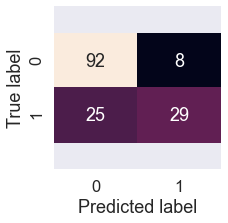

In [17]:
plot_conf_mat(y_test, y_pred)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.5370370370370371


In [20]:
x_test

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
488,4,99,72,17,0,25.6,0.294,28
413,1,143,74,22,61,26.2,0.256,21
112,1,89,76,34,37,31.2,0.192,23
222,7,119,0,0,0,25.2,0.209,37
711,5,126,78,27,22,29.6,0.439,40
...,...,...,...,...,...,...,...,...
139,5,105,72,29,325,36.9,0.159,28
178,5,143,78,0,0,45.0,0.190,47
654,1,106,70,28,135,34.2,0.142,22
110,3,171,72,33,135,33.3,0.199,24


In [19]:
logmodel.predict_proba(x_test)

array([[0.9276815 , 0.0723185 ],
       [0.83536235, 0.16463765],
       [0.9582742 , 0.0417258 ],
       [0.54299298, 0.45700702],
       [0.71155119, 0.28844881],
       [0.77731849, 0.22268151],
       [0.97054935, 0.02945065],
       [0.90450003, 0.09549997],
       [0.22063851, 0.77936149],
       [0.95222112, 0.04777888],
       [0.78437225, 0.21562775],
       [0.94749391, 0.05250609],
       [0.2412742 , 0.7587258 ],
       [0.97123774, 0.02876226],
       [0.9521665 , 0.0478335 ],
       [0.71309672, 0.28690328],
       [0.72994786, 0.27005214],
       [0.47858703, 0.52141297],
       [0.85537263, 0.14462737],
       [0.30077267, 0.69922733],
       [0.24523561, 0.75476439],
       [0.91613813, 0.08386187],
       [0.56842601, 0.43157399],
       [0.97141709, 0.02858291],
       [0.76950666, 0.23049334],
       [0.82665784, 0.17334216],
       [0.52200476, 0.47799524],
       [0.91608139, 0.08391861],
       [0.95267464, 0.04732536],
       [0.93620007, 0.06379993],
       [0.

In [21]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
y_pred_proba

array([0.0723185 , 0.16463765, 0.0417258 , 0.45700702, 0.28844881,
       0.22268151, 0.02945065, 0.09549997, 0.77936149, 0.04777888,
       0.21562775, 0.05250609, 0.7587258 , 0.02876226, 0.0478335 ,
       0.28690328, 0.27005214, 0.52141297, 0.14462737, 0.69922733,
       0.75476439, 0.08386187, 0.43157399, 0.02858291, 0.23049334,
       0.17334216, 0.47799524, 0.08391861, 0.04732536, 0.06379993,
       0.06112748, 0.00318709, 0.02598234, 0.23246794, 0.69988543,
       0.86857089, 0.16839842, 0.86323277, 0.18031084, 0.14497992,
       0.08912967, 0.87351924, 0.13905406, 0.46594961, 0.24512513,
       0.22810548, 0.23631124, 0.11868897, 0.52052944, 0.92481819,
       0.03856982, 0.19198483, 0.64910895, 0.39762427, 0.22151519,
       0.29428497, 0.15644282, 0.03175079, 0.66158974, 0.70445874,
       0.0589606 , 0.24469786, 0.02957674, 0.08682856, 0.98174834,
       0.10100358, 0.00173006, 0.81344474, 0.03527935, 0.39991042,
       0.63038761, 0.04264513, 0.38406056, 0.40938748, 0.49872

In [ ]:
logmodel.predict_proba(x_test)

In [22]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [23]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

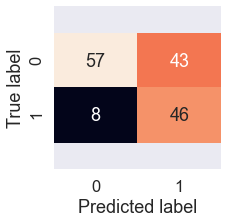

In [24]:
plot_conf_mat(y_test, y_pred)

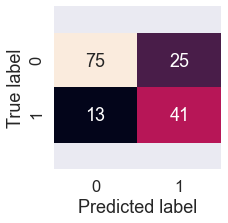

In [25]:
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype('float')
plot_conf_mat(y_test, y_pred)

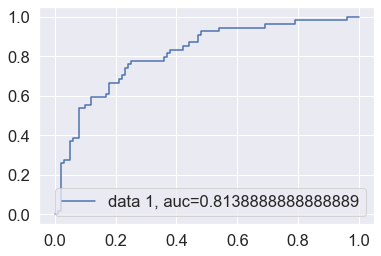

In [26]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
df = pd.read_table('diabetesdata.txt')
#check data has been read in properly

In [27]:
X=df[['Glucose','BMI']]
y = df['Diabetes']

In [28]:
X

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1
...,...,...
763,101,32.9
764,122,36.8
765,121,26.2
766,126,30.1


In [29]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [30]:
classifier=LogisticRegression(penalty='none')
classifier.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [31]:
def plot_dec_boundary(estimator,X,Y,h):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    X=np.array(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

<ipython-input-31-4eb947678218>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


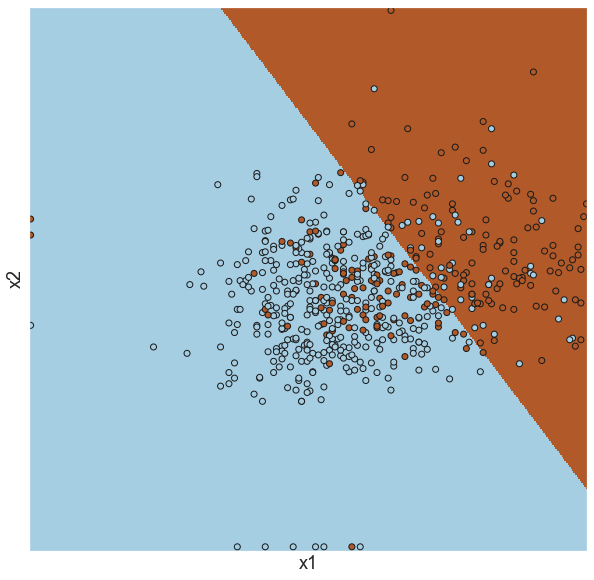

In [32]:
plot_dec_boundary(classifier,X_train,y_train,h=0.25)

<ipython-input-31-4eb947678218>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


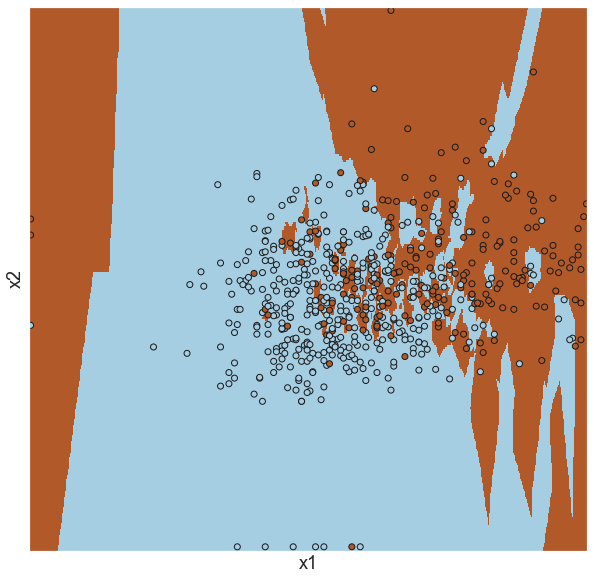

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
plot_dec_boundary(classifier,X_train,y_train,h=0.25)